<a href="https://colab.research.google.com/github/fbelinchon/movie_sentiment/blob/master/SENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie Sentiment

In [5]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
!ln -fs '../gdrive/My Drive/data' '/content'

## read csv

In [0]:
from fastai.text import *
from fastai.utils import *
import pdb

In [0]:
path = pathlib.Path('/content/data/movie_sentiment/')
df_train = pd.read_csv(path/'train.tsv',sep='\t')
df_test = pd.read_csv(path/'test.tsv',sep='\t')

In [0]:
df_train


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [0]:
df_sentences=df_train.groupby(['SentenceId'])['Sentiment','Phrase'].first()

In [0]:
df_sentences

,Sentiment,Phrase
SentenceId,,
1,1,A series of escapades demonstrating the adage ...
2,4,"This quiet , introspective and entertaining in..."
3,1,"Even fans of Ismail Merchant 's work , I suspe..."
4,3,A positively thrilling combination of ethnogra...
5,1,Aggressive self-glorification and a manipulati...
6,4,A comedy-drama of nearly epic proportions root...
7,1,"Narratively , Trouble Every Day is a plodding ..."
8,3,"The Importance of Being Earnest , so thick wit..."
9,1,But it does n't leave you with much .


In [0]:
df_sentences.to_csv(path/'train.csv')


In [0]:
df_senten_train=df_sentences[0:6800]
df_senten_valid=df_sentences[6800:8529]

In [0]:
TextDataBunch??

In [0]:
data_lm = (TextDataBunch.from_csv(path,'train.csv'))

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:525: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
8446, 657, 8331, 1001, 5472...
  if getattr(ds, 'warn', False): warn(ds.warn)


In [0]:
data_lm.show_batch()

text,target
"xxbos xxup -lrb- xxmaj city xxup -rrb- reminds us how realistically nuanced a xxmaj robert xxmaj de xxmaj niro performance can be when he is not more xxunk engaged in the shameless self - xxunk of ` xxmaj analyze xxmaj this ' xxup -lrb- 1999 xxup -rrb- and ` xxmaj analyze xxmaj that , ' promised xxup -lrb- or xxunk xxup -rrb- for later this year .",3
"xxbos ... spiced with humor xxup -lrb- ' i speak fluent xxunk , ' xxunk xxmaj xxunk after a rather , xxunk , xxunk exchange with an alien xxunk xxup -rrb- and witty xxunk xxup -lrb- xxmaj silver 's xxunk has been replaced with xxmaj morph , a cute alien creature who xxunk everyone and everything around xxup -rrb-",3
xxbos xxmaj better than the tepid xxmaj star xxmaj trek : xxmaj xxunk ; falls short of xxmaj first xxmaj contact because the villain could n't pick the xxunk off xxmaj xxunk xxmaj queen xxmaj alice xxmaj xxunk 's xxunk ; and xxunk half a xxunk xxup -lrb- a nose xxup -rrb- ahead of xxmaj generations .,2
"xxbos xxmaj xxunk - xxunk xxmaj jeong 's xxmaj take xxmaj care of xxmaj my xxmaj cat brings a beguiling freshness to a coming - of - age story with such a buoyant , xxunk flow of images that it emerges as another key xxunk to the xxunk of the xxmaj south xxmaj korean cinema .",3
"xxbos xxmaj as with so many xxunk - to - the - max movies of this type , more time appears to have gone into xxunk the right bands for the xxunk and the xxunk of the stars than into the script , which has a handful of smart jokes and not much else .",1


In [0]:
data_lm.save()

In [0]:
data = load_data(path)

# Tokenization

In [0]:
data = TextClasDataBunch.from_df??

In [0]:
data = TextClasDataBunch.from_df(path, df_senten_train,df_senten_valid,bs=bs)


In [0]:
data.one_batch()

(tensor([[   2,    6,   56,  ...,   28,  214,    9],
         [   1,    1,    1,  ...,   28,   27,    9],
         [   1,    1,    1,  ...,    5, 2830,    9],
         ...,
         [   1,    1,    1,  ...,  185, 1161,    9],
         [   1,    1,    1,  ...,   16, 5253,    9],
         [   1,    1,    1,  ..., 1263, 3771,    9]]),
 tensor([3, 1, 1, 4, 1, 1, 3, 2, 2, 4, 3, 1, 2, 3, 0, 3, 4, 2, 3, 0, 1, 1, 3, 3,
         0, 4, 2, 4, 2, 1, 1, 3, 3, 1, 4, 2, 0, 3, 3, 3, 1, 0, 1, 3, 1, 0, 3, 2]))

# Numericalization

In [0]:
data.vocab.itos[:20]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 '.',
 'the',
 ',',
 'a',
 'and',
 'of',
 'to',
 '-',
 'is',
 "'s",
 'it']

In [0]:
data.train_ds[10][0]

Text xxbos xxmaj there 's little to recommend xxmaj snow xxmaj dogs , unless one considers cliched dialogue and perverse escapism a source of high hilarity .

In [0]:
data.train_ds[0][0].data[:10]

array([   2,   12,  326,   14,    0, 3660,   10, 3661,   20,   59])

### With the data block API

We can use the data block API with NLP and have a lot more flexibility than what the default factory methods offer. In the previous example for instance, the data was randomly split between train and validation instead of reading the third column of the csv.

With the data block API though, we have to manually call the tokenize and numericalize steps. This allows more flexibility, and if you're not using the defaults from fastai, the various arguments to pass will appear in the step they're revelant, so it'll be more readable.

In [0]:
list(range(1000,1020))


[1000,
 1001,
 1002,
 1003,
 1004,
 1005,
 1006,
 1007,
 1008,
 1009,
 1010,
 1011,
 1012,
 1013,
 1014,
 1015,
 1016,
 1017,
 1018,
 1019]

In [0]:
data1 = (TextList.from_csv(path, 'train.csv')
                .split_by_rand_pct(0.1)
                .label_from_df(cols=0)
                .databunch(bs=1024))

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:525: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
1944, 603, 7662, 3743, 2889...
  if getattr(ds, 'warn', False): warn(ds.warn)


In [0]:
bs=48

In [0]:
language_model_learner??

In [0]:
learn = language_model_learner(data1, AWD_LSTM, drop_mult=0.3)

In [0]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time


ValueError: ignored

In [0]:
a1=pd.read_csv(path/'train.csv')
a1

,SentenceId,Sentiment,Phrase
0,1,1,A series of escapades demonstrating the adage ...
1,2,4,"This quiet , introspective and entertaining in..."
2,3,1,"Even fans of Ismail Merchant 's work , I suspe..."
3,4,3,A positively thrilling combination of ethnogra...
4,5,1,Aggressive self-glorification and a manipulati...
5,6,4,A comedy-drama of nearly epic proportions root...
6,7,1,"Narratively , Trouble Every Day is a plodding ..."
7,8,3,"The Importance of Being Earnest , so thick wit..."
8,9,1,But it does n't leave you with much .
9,10,1,You could hate it for the same reason .


In [0]:
data_lm = TextClasDataBunch.from_csv(path, 'train.csv',text_cols='Phrase',label_cols='Sentiment')

In [0]:
data_lm.show_batch()


text,target
"xxbos xxmaj so we got xxmaj ten xxmaj little xxmaj indians meets xxmaj friday the xxunk by way of xxmaj clean and xxmaj sober , filmed on the set of xxmaj carpenter 's xxmaj the xxmaj thing and loaded with actors you 're most likely to find on the next inevitable xxunk of xxmaj the xxmaj love xxmaj boat .",1
"xxbos xxmaj when it 's not wallowing in xxunk melodrama , `` xxmaj real xxmaj women xxmaj have xxmaj curves '' is a sweet , honest , and enjoyable comedy - drama about a young woman who wants many things in life , but fears she 'll become her mother before she gets to fulfill her dreams .",3
"xxbos xxmaj there are n't too many films that can be as simultaneously funny , offbeat and heartwarming xxup -lrb- without a thick xxunk of the goo , at least xxup -rrb- , but `` xxmaj elling '' manages to do all three quite well , making it one of the year 's most enjoyable xxunk .",4
"xxbos xxmaj build some xxunk , haul 'em to the theatre with you for the late show , and put on your own xxmaj mystery xxmaj science xxmaj theatre 3000 tribute to what is almost certainly going to go down as the worst -- and only -- killer website movie of this or any other year .",0
"xxbos xxmaj notwithstanding my problem with the movie 's final half hour , i ' m going to recommend xxup secretary , based on the wonderful acting xxunk put on by xxmaj spader and xxmaj gyllenhaal , and also the unique way xxmaj xxunk goes about telling what at heart is a sweet little girl -",3


In [0]:
data_lm.train_ds[0][0].data[:20]

array([   2,   12,  421, 2914,   78,   85,  271,   22,  309,   22,   19, 1420,   19,   17,    9])

In [0]:
data1.batch_size

64

In [0]:
data_lm = (TextList.from_csv(path,'train.csv')
            .split_by_rand_pct(0.1)
           .text_cols(2)
           #We randomly split and keep 10% (10,000 reviews) for validation
            .label_from_df(cols='Sentiment')           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))

AttributeError: ignored

In [0]:
data_lm.show_batch()

text,target
xxbos xxrep 4 xxunk,4
xxbos xxrep 4 xxunk,1
xxbos xxunk,3
xxbos xxunk,1
xxbos xxunk,3


In [0]:
data = TextLMDataBunch.from_csv(path, 'train.csv')

# Language Model

## Language Model

In [0]:
# Language Model
data_lm = TextLMDataBunch.from_csv(path, 'train.csv',text_cols=2,label_cols=1,bs=32)

In [182]:
data_lm.show_batch()

idx,text
0,"film is a confusing xxunk of tones and styles , one moment a romantic trifle and the next a turgid drama . xxbos xxmaj feels at times like a giant commercial for xxmaj universal xxmaj studios , where much of the action takes place . xxbos xxmaj just the sort of lazy tearjerker that gives movies about ordinary folk a bad name . xxbos xxmaj an uplifting , largely bogus"
1,"showing honest emotions . xxbos xxmaj well , they 're ` they ' . xxbos xxmaj men in xxmaj black xxup ii achieves ultimate insignificance -- it 's the sci - fi comedy spectacle as xxmaj xxunk - xxmaj ball epic . xxbos xxmaj its cast full of caffeinated comedy performances more than make up for its logical xxunk , which fly by so fast there 's no time to"
2,"xxmaj williams and psycho killer , and you think , h xxrep 5 m . xxbos a dull , dumb and derivative horror film . xxbos xxmaj this movie is so bad , that it 's almost worth seeing because it 's so bad . xxbos xxmaj all in all , a great party . xxbos xxmaj even though we know the outcome , the seesawing of the general 's"
3,"who sadly are at xxunk odds with one another through recklessness and retaliation . xxbos a fairly harmless but ultimately lifeless feature - length xxunk special . xxbos xxmaj this one is certainly well - meaning , but it 's also simple - minded and contrived . xxbos xxmaj they 're just a couple of cops in xxmaj xxunk , these two , but in xxmaj narc , they find"
4,"life persona is so charmless and xxunk . xxbos xxmaj what i saw , i enjoyed . xxbos xxmaj if you 're really xxunk this you 're not interested in xxunk in your entertainment choices , you 're interested in xxmaj anne xxmaj xxunk , xxmaj john xxmaj xxunk , and xxmaj thomas xxmaj xxunk . xxbos xxmaj it just does n't have much else ... especially in a moral"


## Classification Model

In [0]:
data_clas=TextClasDataBunch.from_csv(path, 'train.csv', vocab=data_lm.train_ds.vocab, bs=32,text_cols=2,label_cols=1)
    

In [5]:
data_clas.show_batch()

text,target
"xxbos xxup -lrb- xxmaj city xxup -rrb- reminds us how realistically nuanced a xxmaj robert xxmaj de xxmaj niro performance can be when he is not more xxunk engaged in the shameless self - caricature of ` xxmaj analyze xxmaj this ' xxup -lrb- 1999 xxup -rrb- and ` xxmaj analyze xxmaj that , ' promised xxup -lrb- or xxunk xxup -rrb- for later this year .",3
"xxbos xxmaj the xxunk - old xxmaj godard has become , to judge from xxmaj in xxmaj praise of xxmaj love , the sort of bitter old xxunk who sits behind his light xxunk and harangues the supposed xxunk of the artistic world - at - large without doing all that much to correct them .",2
"xxbos xxmaj if xxup xxunk seems like a strange xxunk to true love , maybe it is , but it 's to this film 's xxup -lrb- and its makers ' xxup -rrb- credit that we believe that that 's exactly what these two people need to find each other -- and themselves .",3
"xxbos xxmaj the film was produced by xxmaj jerry xxmaj bruckheimer and directed by xxmaj joel xxmaj schumacher , and reflects the worst of their shallow styles : wildly overproduced , xxunk motivated every step of the way and demographically targeted to please every one xxup -lrb- and no one xxup -rrb- .",1
"xxbos xxmaj the following things are not at all entertaining : xxmaj the bad sound , the lack of climax and , worst of all , watching xxmaj seinfeld xxup -lrb- who is also one of the film 's producers xxup -rrb- do everything he can to look like a good guy .",0


In [0]:
learn = language_model_learner(data_lm,AWD_LSTM,drop_mult=0.5)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


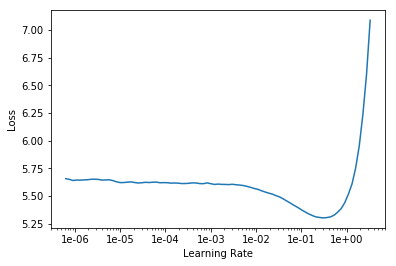

In [8]:
learn.lr_find()
learn.recorder.plot()

In [10]:
learn.fit_one_cycle(2,2e-2)

epoch,train_loss,valid_loss,accuracy,time
0,3.784525,3.884371,0.327158,00:09
1,3.569444,3.861104,0.330481,00:10


In [11]:
learn.fit_one_cycle(1,2e-2)

epoch,train_loss,valid_loss,accuracy,time
0,3.465053,3.904281,0.327480,00:10


In [12]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


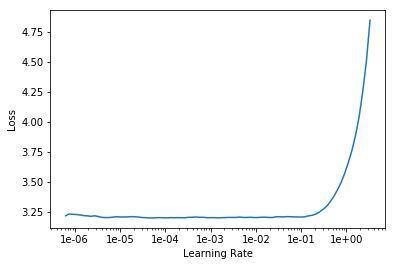

In [13]:
learn.recorder.plot()

In [14]:
learn.unfreeze()
learn.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.174829,3.896461,0.330556,00:12


In [15]:
learn.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.035531,3.910081,0.331027,00:12


In [17]:
learn.predict("This is a review about", n_words=100)

"This is a review about an erotic New York gang gang gang gang member in Reno who ca n't figure out how to pays off war victims . xxbos This fact sounds like an extended , open - ended poem to urban Iran . xxbos The tale of mixed emotions , particularly in familial matters , feels too long through the big signs that the characters are already recycled and less attention to detail is sacrificed for utter loss . xxbos And the Son of the Bride have a excellent master of execution and a second"

In [0]:
??learn.predict

In [0]:
learn.save_encoder('ft_enc2')

## Building a classifier

In [0]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)

In [0]:
learn.load_encoder('ft_enc2')

In [21]:
data_clas.show_batch()

text,target
"xxbos xxup -lrb- xxmaj city xxup -rrb- reminds us how realistically nuanced a xxmaj robert xxmaj de xxmaj niro performance can be when he is not more xxunk engaged in the shameless self - caricature of ` xxmaj analyze xxmaj this ' xxup -lrb- 1999 xxup -rrb- and ` xxmaj analyze xxmaj that , ' promised xxup -lrb- or xxunk xxup -rrb- for later this year .",3
"xxbos xxmaj it may not be as cutting , as witty or as true as back in the glory days of xxmaj xxunk and xxmaj two or xxmaj three xxmaj things i xxmaj know xxmaj about xxmaj her , but who else engaged in filmmaking today is so xxunk of the cultural and moral issues involved in the process ?",2
"xxbos xxmaj notwithstanding my problem with the movie 's final half hour , i ' m going to recommend xxup secretary , based on the wonderful acting clinic put on by xxmaj spader and xxmaj gyllenhaal , and also the unique way xxmaj shainberg goes about telling what at heart is a sweet little girl -",3
"xxbos xxmaj were xxmaj dylan xxmaj thomas alive to witness first - time director xxmaj xxunk xxmaj hawke 's strained xxmaj chelsea xxmaj walls , he might have been xxunk to change his landmark poem to , ` xxmaj do xxmaj not xxmaj go xxmaj gentle xxmaj into xxmaj that xxmaj good xxmaj theatre . '",1
"xxbos xxmaj the xxunk - old xxmaj godard has become , to judge from xxmaj in xxmaj praise of xxmaj love , the sort of bitter old xxunk who sits behind his light xxunk and harangues the supposed xxunk of the artistic world - at - large without doing all that much to correct them .",2


In [27]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.413588,1.348796,0.409144,00:07


In [28]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(5e-3/2., 5e-3))

epoch,train_loss,valid_loss,accuracy,time
0,1.405130,1.356438,0.401524,00:08


In [30]:
learn.fit_one_cycle(1, slice(5e-3/2., 5e-3))

epoch,train_loss,valid_loss,accuracy,time
0,1.370533,1.312055,0.427902,00:08


In [95]:
learn.unfreeze()
learn.fit_one_cycle(1, slice(2e-3/100, 2e-3))

epoch,train_loss,valid_loss,accuracy,time
0,1.278720,1.295137,0.435522,00:15


In [31]:
learn.predict("This was a great movie!")

(Category 4, tensor(4), tensor([0.0734, 0.1022, 0.1080, 0.2928, 0.4236]))

In [32]:
learn.predict("This was a average movie!")

(Category 1, tensor(1), tensor([0.3012, 0.3303, 0.1736, 0.1152, 0.0797]))

In [33]:
learn.show_results(rows=20)

text,target,prediction
xxbos xxmaj better than the tepid xxmaj star xxmaj trek : xxmaj xxunk ; falls short of xxmaj first xxmaj contact because the villain could n't pick the xxunk off xxmaj xxunk xxmaj queen xxmaj alice xxmaj xxunk 's xxunk ; and xxunk half a xxunk xxup -lrb- a nose xxup -rrb- ahead of xxmaj generations .,2,1
"xxbos xxmaj sitting in the third row of the xxup imax cinema at xxmaj xxunk 's xxmaj darling xxmaj xxunk , but i sometimes felt as though i was in the tiny two xxunk plane that carried the giant camera around xxmaj australia , sweeping and xxunk , xxunk and xxunk over some of the most not",3,2
"xxbos xxmaj there are n't too many films that can be as simultaneously funny , offbeat and heartwarming xxup -lrb- without a thick xxunk of the xxunk , at least xxup -rrb- , but `` xxmaj xxunk '' manages to do all three quite well , making it one of the year 's most enjoyable xxunk .",4,4
"xxbos xxup -lrb- xxmaj clooney 's xxup -rrb- debut can be xxunk of being a bit xxunk , but it has a tremendous , offbeat sense of style and humor that suggests he was influenced by some of the filmmakers who have directed him , especially the xxmaj coen brothers and xxmaj steven xxmaj soderbergh .",3,4
xxbos xxmaj the movie obviously seeks to re - create the excitement of such ' 50s flicks as xxmaj xxunk xxmaj xxunk 's ' xxunk xxmaj xxunk xxmaj under the xxmaj sea ' and the xxmaj george xxmaj xxunk version of xxup h.g. xxmaj wells ' ` xxmaj the xxmaj time xxmaj machine . ',2,1
"xxbos xxmaj the wonderfully lush xxmaj morvern xxmaj callar is pure punk existentialism , and xxmaj ms. xxmaj ramsay and her co - writer , xxmaj xxunk xxmaj xxunk , have xxunk the xxmaj xxunk xxmaj xxunk novel , which itself felt like an answer to xxmaj xxunk xxmaj welsh 's book xxmaj xxunk .",3,3
"xxbos xxmaj the star who helped give a spark to `` xxmaj xxunk xxmaj amy '' and `` xxmaj changing xxmaj lanes '' falls flat as thinking man xxup cia agent xxmaj jack xxmaj ryan in this summer 's new action film , `` xxmaj the xxmaj sum of xxmaj all xxmaj fears . ''",1,1
"xxbos xxmaj you may be xxunk , as i was , by its moods , and by its subtly xxunk star , and still wonder why xxmaj paul xxmaj thomas xxmaj anderson ever had the inclination to make the most sincere and artful movie in which xxmaj adam xxmaj sandler will probably ever appear .",3,3
"xxbos xxmaj it cuts to the core of what it actually means to face your fears , to be a girl in a world of boys , to be a boy truly in love with a girl , and to ride the big metaphorical wave that is life -- wherever it takes you .",4,3
"xxbos xxmaj as xxunk as the movie tries to make sense of its title character , there remains a huge gap between the film 's creepy , clean - cut xxmaj dahmer xxup -lrb- xxmaj jeremy xxmaj renner xxup -rrb- and xxunk acts that no amount of earnest textbook xxunk can bridge .",0,1


In [0]:
learn.metrics=[accuracy, Fbeta_binary(beta2=1,clas = 1)]

In [0]:
@dataclass
class Fbeta_binary(Callback):
    "Computes the fbeta between preds and targets for single-label classification"
    beta2: int = 2
    eps: float = 1e-9
    clas:int=1
    
    def on_epoch_begin(self, **kwargs):
        self.TP = 0
        self.total_y_pred = 0   
        self.total_y_true = 0
    
    def on_batch_end(self, last_output, last_target, **kwargs):
        y_pred = last_output.argmax(dim=1)
        y_true = last_target.float()
        
        self.TP += ((y_pred==self.clas) * (y_true==self.clas)).float().sum()
        self.total_y_pred += (y_pred==self.clas).float().sum()
        self.total_y_true += (y_true==self.clas).float().sum()
    
    def on_epoch_end(self, **kwargs):
        beta2=self.beta2**2
        prec = self.TP/(self.total_y_pred+self.eps)
        rec = self.TP/(self.total_y_true+self.eps)       
        res = (prec*rec)/(prec*beta2+rec+self.eps)*(1+beta2)
        self.metric = res

In [37]:
learn.fit_one_cycle(1, slice(2e-3/100, 2e-3))